# Algoritmo de Havel-Hakimi

In [1]:
def hh(lst):
    """
    hh(lst) (hh por Havel-Hakimi) devuelve True sii la lista lst 
    es una sucención gráfica. Convenimos en que [] es una sucesión 
    gráfica.
    """
    sld, l = True, len(lst)
    if l:
        lst.sort(reverse=True)
        b = (lst[-1] < 0) or (lst[0] > l-1) or (mod(sum(lst),2) == 1)
        if b:
            sld = False
        elif lst[0] == 0:
            sld = True
        else:
            sntnl = True
            while sntnl:
                x = lst[0]
                del(lst[0])
                for i in range(x):
                    lst[i] -= 1
                lst.sort(reverse=True)
                if lst[-1] < 0:
                    sntnl, sld = False, False
                elif lst[0] == 0:
                    sntnl = False            
    return sld

In [2]:
hh([])

True

In [3]:
hh([0])

True

In [4]:
hh([0,0,0])

True

In [5]:
hh([1,1,1,1,1,1])

True

In [6]:
hh([1,1,1,1,1])

False

In [7]:
hh([4,3,3,2,2,1])

False

In [8]:
hh([5,4,3,2,2])

False

In [9]:
hh([5,4,4,2,2,1])

False

In [10]:
hh([5,4,4,2,2,0])

False

In [11]:
hh([4,4,2,2,1,1,1,1])

True

In [12]:
hh([4,4,3,2,2,2,1])

True

In [13]:
hh([4,4,4,4,4,4,4,4,4,4,4,4,4,4,4])

True

In [14]:
hh([5,3,1,1,1,1])    # esta es la buena, la que hace entrar en el núcleo del algoritmo

False

In [20]:
hh([4]*15)

True

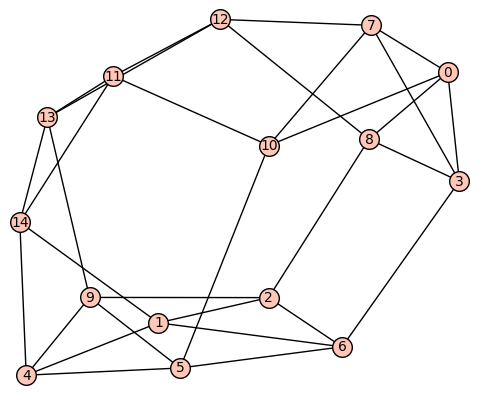

In [21]:
graphs.RandomRegular(4, 15).plot()

In [22]:
hh(range(2,7543,2))

False

# Paso del Caballo

In [1]:
def pasoCaballo(m):
    """
    pasoCaballo considera un tablero de ajedrez con 
    m columnas y genera un criterio booleano para relacionar
    dos de sus casillas. El criterio es que un caballo de ajedrez
    pueda viajar en un salto de la situada anterior a la situada
    posterior en el tablero.
    """
    return lambda y,x: (y-x == m-2 and mod(x,m) > 1) or \
                       (y-x == 2*m-1 and mod(x,m) > 0) or \
                       (y-x == 2*m+1 and mod(x,m) < m-1) or \
                       (y-x == m+2 and mod(x,m) < m-2)

In [2]:
pasoCaballo(8)(7,16)

False

In [3]:
def grafoPasoCaballoOldCode(m,n):
    """
    grafoPasoCaballo genera el grafo cuyos vértices
    representan a las casillas de un tablero de m
    columnas y n filas. Hay un eje entre dos vértices
    sii el caballo puede dar un salto de la casilla que
    representa uno a la casilla que representa el otro.
    """
    m, n = int(m), int(n)
    return Graph([range(m*n),pasoCaballo(m)])

In [4]:
from itertools import product

In [5]:
def grafoPasoCaballo(m,n):
    """
    grafoPasoCaballo genera el grafo cuyos vértices
    representan a las casillas de un tablero de m
    columnas y n filas. Hay un eje entre dos vértices
    sii el caballo puede dar un salto de la casilla que
    representa uno a la casilla que representa el otro.
    """
    m, n = int(m), int(n)
    data = {}
    for i, x in enumerate(range(n*m)):
        data[x] = []
        for j,y in enumerate(range(n*m)):
            if i != j:
                if pasoCaballo(m)(x,y):
                     data[x].append(y)
                        
    return Graph(data)

In [6]:
def grafoPasoCaballo(m,n):
    """
    grafoPasoCaballo genera el grafo cuyos vértices
    representan a las casillas de un tablero de m
    columnas y n filas. Hay un eje entre dos vértices
    sii el caballo puede dar un salto de la casilla que
    representa uno a la casilla que representa el otro.
    """
    m, n = int(m), int(n)
    data = {}
    for y, j in product(range(n*m), repeat=2):
        if y!=j :
            k = data.get(y, [])
            if pasoCaballo(m)(y,j):
                k.append(j)
            data[y] = k
    return Graph(data)

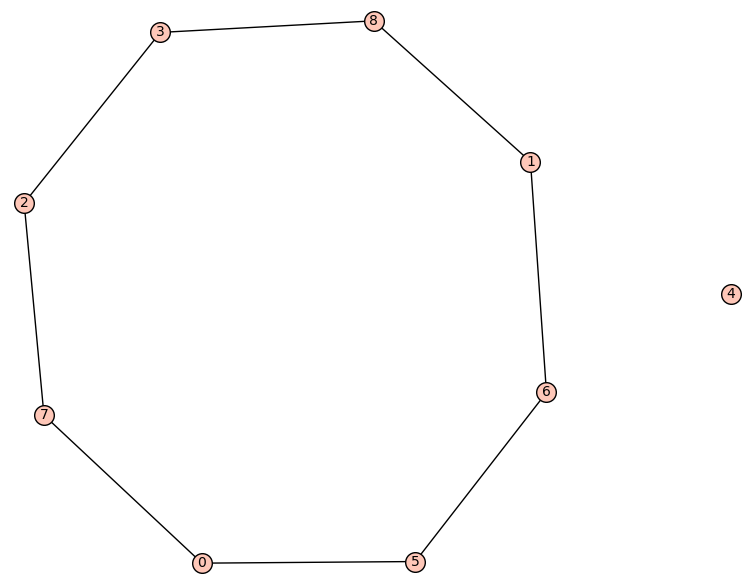

In [7]:
grafoPasoCaballo(3,3).plot()

In [8]:
grafoPasoCaballo(3,3).is_connected()

False

In [9]:
grafoPasoCaballo(3,3).connected_components_number()

2

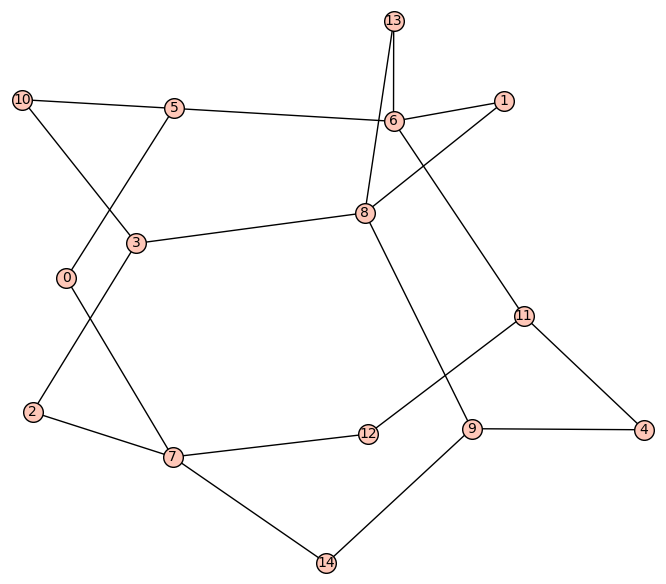

In [10]:
grafoPasoCaballo(3,5).plot()

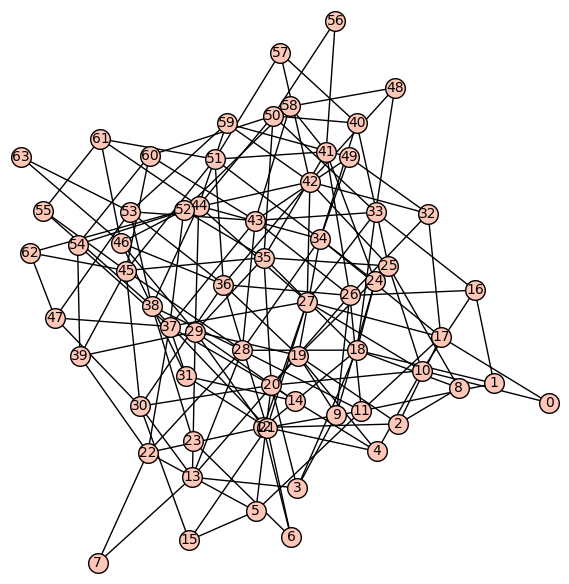

In [11]:
grafoPasoCaballo(8,8).plot()

In [12]:
grafoPasoCaballo(8,8).is_hamiltonian()

True